In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import time
import os

In [3]:
train_set = 'bag_of_words_training_data.csv'
test_set = ''
export = 'bag_of_words_results.csv'

# train_set = 'tf_idf_training_data.csv'
# test_set = ''
# export = 'tf_idf_results.csv'

# train_set = 'bag_of_words_training_data.csv'
# test_set = 'bag_of_words_bing_data.csv'
# export = 'bow_bing_results.csv'

# train_set = 'tf_idf_training_data.csv'
# test_set = 'tf_idf_bing_data.csv'
# export = 'tf_idf_bing_results.csv'

## Model Training 

In [2]:
data_file_path = os.path.abspath(os.path.join(os.pardir,'data',train_set))
data = pd.read_csv(data_file_path)
# X dataframe 
X = data.drop(['News Category'],axis=1) 
# y series
y = data['News Category']

In [3]:
pca = PCA(n_components=100)
X = pca.fit_transform(X)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [5]:
svc = SVC()

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
svc_acc = []

start = time.time()

for train_index, vaild_index in skf.split(X_train,y_train):
    x_t, x_v = X_train[train_index], X_train[vaild_index]
    y_t, y_v = y_train[train_index], y_train[vaild_index]
    svc.fit(x_t, y_t)
    svc_acc.append(svc.score(x_v, y_v))

stop = time.time()
svm_tt = round((stop-start) / 60, 2)
print(f"Training time: {svm_tt}min")

Training time: 9.19min


In [6]:
print(svc_acc)

[0.8461486789072996, 0.8499552171965965]


In [7]:
print(np.mean(svc_acc))

0.8480519480519481


In [8]:
lr = LogisticRegression(solver='newton-cg')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
lr_acc = []

start = time.time()

for train_index, vaild_index in skf.split(X_train,y_train):
    x_t, x_v = X_train[train_index], X_train[vaild_index]
    y_t, y_v = y_train[train_index], y_train[vaild_index]
    lr.fit(x_t, y_t)
    lr_acc.append(lr.score(x_v, y_v))

stop = time.time()
lr_tt = round((stop-start) / 60, 2)
print(f"Training time: {lr_tt}min")

Training time: 0.29min


In [9]:
print(lr_acc)

[0.8311128526645768, 0.8296574115539633, 0.8307769816390506, 0.8338557993730408, 0.831000895656068]


In [10]:
print(np.mean(lr_acc))

0.8312807881773401


In [11]:
gnb = GaussianNB()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
gnb_acc = []

start=time.time()

for train_index, vaild_index in skf.split(X_train,y_train):
    x_t, x_v = X_train[train_index], X_train[vaild_index]
    y_t, y_v = y_train[train_index], y_train[vaild_index]
    gnb.fit(x_t, y_t)
    gnb_acc.append(gnb.score(x_v, y_v))

stop=time.time()
gnb_tt = round((stop-start) / 60, 2)
print(f"Training time: {gnb_tt}min")

Training time: 0.01min


In [12]:
print(gnb_acc)

[0.5962270488132557, 0.599025974025974, 0.5979623824451411, 0.5982422749664129, 0.6004254366323332]


In [13]:
print(np.mean(gnb_acc))

0.5983766233766235


In [14]:
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
rf_acc = []

start=time.time()

for train_index, vaild_index in skf.split(X_train,y_train):
    x_t, x_v = X_train[train_index], X_train[vaild_index]
    y_t, y_v = y_train[train_index], y_train[vaild_index]
    rf.fit(x_t, y_t)
    rf_acc.append(rf.score(x_v, y_v))
    
stop=time.time()
rf_tt = round((stop-start) / 60, 2)
print(f"Training time: {rf_tt}min")

Training time: 4.89min


In [15]:
print(rf_acc)

[0.8081056874160323, 0.8069301388266905, 0.80653828929691, 0.8081056874160323, 0.8083855799373041]


In [16]:
print(np.mean(rf_acc))

0.8076130765785938


## Model Evaluation

In [4]:
if test_set != '':
    data = pd.read_csv(test_set)
    # X dataframe 
    X_test = data.drop(['News Category'],axis=1) 
    # y series
    y_test = data['News Category'].to_numpy()
    
    pca = PCA(n_components=100)
    X_test = pca.fit_transform(X_test)

In [18]:
y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test,y_pred)
lr_recall = recall_score(y_test,y_pred,average='micro')
lr_precision = precision_score(y_test,y_pred,average='micro')
lr_f1 = f1_score(y_test,y_pred,average='micro')

y_pred_roc = OneHotEncoder().fit(y_test.reshape(-1, 1)).transform(y_pred.reshape(-1,1)).toarray()
y_test_roc = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
lr_roc = roc_auc_score(y_test_roc,y_pred_roc,multi_class='ovo')

In [19]:
y_pred = gnb.predict(X_test)

gnb_acc = accuracy_score(y_test,y_pred)
gnb_recall = recall_score(y_test,y_pred,average='micro')
gnb_precision = precision_score(y_test,y_pred,average='micro')
gnb_f1 = f1_score(y_test,y_pred,average='micro')

y_pred_roc = OneHotEncoder().fit(y_test.reshape(-1, 1)).transform(y_pred.reshape(-1,1)).toarray()
y_test_roc = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
gnb_roc = roc_auc_score(y_test_roc,y_pred_roc,multi_class='ovo')

In [20]:
y_pred = svc.predict(X_test)

svc_acc = accuracy_score(y_test,y_pred)
svc_recall = recall_score(y_test,y_pred,average='micro')
svc_precision = precision_score(y_test,y_pred,average='micro')
svc_f1 = f1_score(y_test,y_pred,average='micro')

y_pred_roc = OneHotEncoder().fit(y_test.reshape(-1, 1)).transform(y_pred.reshape(-1,1)).toarray()
y_test_roc = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
svc_roc = roc_auc_score(y_test_roc,y_pred_roc,multi_class='ovo')

In [21]:
y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test,y_pred)
rf_recall = recall_score(y_test,y_pred,average='micro')
rf_precision = precision_score(y_test,y_pred,average='micro')
rf_f1 = f1_score(y_test,y_pred,average='micro')

y_pred_roc = OneHotEncoder().fit(y_test.reshape(-1, 1)).transform(y_pred.reshape(-1,1)).toarray()
y_test_roc = OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()
rf_roc = roc_auc_score(y_test_roc,y_pred_roc,multi_class='ovo')

In [22]:
print("Logistic Regression: ",lr_acc,lr_recall,lr_precision,lr_f1,lr_roc)
print("Naive Bayes: ", gnb_acc,gnb_recall,gnb_precision,gnb_f1,gnb_roc)
print("Support Vector Machine: ", svc_acc,svc_recall,svc_precision,svc_f1,svc_roc)
print("Random Forest: ", rf_acc,rf_recall,rf_precision,rf_f1,rf_roc)

Logistic Regression:  0.8288923719958202 0.8288923719958202 0.8288923719958202 0.8288923719958202 0.8859536470644196
Naive Bayes:  0.5972309299895506 0.5972309299895506 0.5972309299895506 0.5972309299895506 0.7316268481700499
Support Vector Machine:  0.843521421107628 0.843521421107628 0.843521421107628 0.843521421107628 0.8957040340141593
Random Forest:  0.8043103448275862 0.8043103448275862 0.8043103448275862 0.8043103448275861 0.8695783496297997


In [23]:
results = pd.DataFrame([[lr_acc,lr_recall,lr_precision,lr_f1,lr_roc],
                        [gnb_acc,gnb_recall,gnb_precision,gnb_f1,gnb_roc],
                        [svc_acc,svc_recall,svc_precision,svc_f1,svc_roc],
                        [rf_acc,rf_recall,rf_precision,rf_f1,rf_roc]],
                       columns=['accuracy','recall','precision','fl-score','roc_auc'], 
                       index=["Logistic Regression","Naive Bayes","Support Vector Machine","Random Forest"])

In [24]:
print(results)

                        accuracy    recall  precision  fl-score   roc_auc
Logistic Regression     0.828892  0.828892   0.828892  0.828892  0.885954
Naive Bayes             0.597231  0.597231   0.597231  0.597231  0.731627
Support Vector Machine  0.843521  0.843521   0.843521  0.843521  0.895704
Random Forest           0.804310  0.804310   0.804310  0.804310  0.869578


In [25]:
export_file_path = os.path.abspath(os.path.join(os.pardir,'data',export))
results.to_csv(export_file_path)

### Training Time

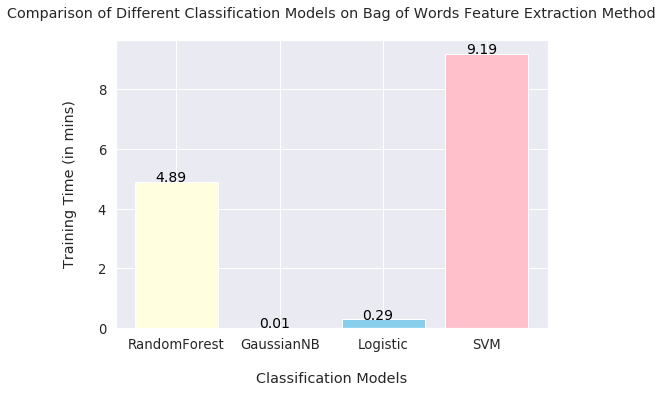

In [26]:
sns.set(font_scale=1.2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RandomForest', 'GaussianNB', 'Logistic', 'SVM']
TrainingTime=[rf_tt,gnb_tt,lr_tt,svm_tt]
ax.bar(Models,TrainingTime,color=["lightyellow","lightgreen", "skyblue", "pink"]);
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height(), str(round(i.get_height(),2)), fontsize=14, color='black')
plt.title('Comparison of Different Classification Models on Bag of Words Feature Extraction Method\n');
plt.ylabel('Training Time (in mins)\n');
plt.xlabel('\nClassification Models');
# plt.savefig('bow_model_training_times.png', bbox_inches='tight')
plt.show();